In [1]:
import sympy
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from sympy import sin, cos, Matrix
from sympy import symbols, Matrix, Transpose, init_session, Array, tensorproduct
from sympy.physics.vector import ReferenceFrame, outer


In [2]:
phi, theta, t, w, L, A , psi, sigma= symbols('ϕ θ t ω L A ψ σ')
init_session(use_unicode=True)

IPython console for SymPy 1.6.2 (Python 3.8.5-64-bit) (ground types: python)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.6.2/



In [3]:
#Defining h
def h(t, L, e_mais, e_cruzado,A):
	h_mais = A*cos(w*t-w*L)
	h_cruzado = A*sin(w*t-w*L)
	return h_mais*e_mais + h_cruzado*e_cruzado

In [4]:
#Defining h
def h_new(t, L, e_mais, e_cruzado,A):
	h_mais = A*cos(w*t-w*L)
	h_cruzado = A*sin(w*t-w*L)
	return h_mais*e_mais + h_cruzado*e_cruzado

In [5]:
def PSI(n,h,k):
	return 0.5*(n*h*n.transpose()/(1 - (k.dot(n))**2))

In [6]:
#função PSI(t)
def PSI_new(n,h,k):
    
	return 0.5*(n.dot(h.dot(n)))/(1 - (k.dot(n))**2)

In [7]:
# Rotação de matrizes

#rotaçao em z por um angulo phi
R_z=Matrix([[cos(phi), sin(phi), 0], [-sin(phi), cos(phi), 0], [0,0,1]])

#rotaçao em X por um angulo theta
R_X=Matrix([[1, 0, 0], [0, cos(theta), sin(theta)], [0, -sin(theta), cos(theta)]])

#rotacao em Z por psi
R_Z=Matrix([[cos(psi), sin(psi), 0], [-sin(psi), cos(psi), 0], [0,0,1]])

#Matriz de Rotação EULER:(x,y,z) ------> (X,Y,Z)
R = R_Z*R_X*R_z

In [8]:
LabFrame = ReferenceFrame("Lab")
WaveFrame = ReferenceFrame("Wave")
WaveFrame.orient(LabFrame, "body", (phi, theta, psi), 'zxz')

In [9]:
#tensores no referencial da onda
e_mais_onda = Matrix([[1, 0, 0], [0, -1, 0], [0, 0, 0]])
e_cruzado_onda = Matrix([[0, 1, 0], [1, 0, 0], [0, 0, 0]])

In [10]:
n2_mat=Matrix([[cos(sigma),sin(sigma),0]])
n3_mat=Matrix([[cos(sigma),-sin(sigma),0]])

In [11]:
e_plus  = Array([[1, 0, 0], [0, -1, 0], [0, 0, 0]])
e_cross = Array([[0, 1, 0], [1,  0, 0], [0, 0, 0]])

In [12]:
vx = WaveFrame.x
vy = WaveFrame.y
vz = WaveFrame.z
dbaseii = outer(vx, vx)
dbaseij = outer(vx, vy)
dbaseik = outer(vx, vz)
dbaseji = outer(vy, vx)
dbasejj = outer(vy, vy)
dbasejk = outer(vy, vz)
dbaseki = outer(vz, vx)
dbasekj = outer(vz, vy)
dbasekk = outer(vz, vz)

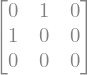

In [13]:
e_plus_dyadic = dbaseii - dbasejj
e_cross_dyadic = dbaseij + dbaseji
e_cross_dyadic.to_matrix(WaveFrame)

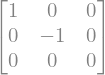

In [14]:
e_plus_dyadic.to_matrix(WaveFrame)

In [16]:
e_plus_dyadic.to_matrix(LabFrame)

⎡                                                                             
⎢                   (-sin(ψ)⋅cos(ϕ) - sin(ϕ)⋅cos(θ)⋅cos(ψ))⋅(sin(ψ)⋅cos(ϕ) + s
⎢                                                                             
⎢                                                                             
⎢(sin(ψ)⋅sin(ϕ) - cos(θ)⋅cos(ψ)⋅cos(ϕ))⋅(-sin(ψ)⋅cos(ϕ) - sin(ϕ)⋅cos(θ)⋅cos(ψ)
⎢                                                                             
⎢                                                                             
⎣                        -(-sin(ψ)⋅cos(ϕ) - sin(ϕ)⋅cos(θ)⋅cos(ψ))⋅sin(θ)⋅cos(ψ

                                                              2               
in(ϕ)⋅cos(θ)⋅cos(ψ)) + (-sin(ψ)⋅sin(ϕ)⋅cos(θ) + cos(ψ)⋅cos(ϕ))                
                                                                              
                                                                              
) + (-sin(ψ)⋅sin(ϕ)⋅cos(θ) + cos(ψ)⋅cos(ϕ))⋅(sin(ψ)

In [16]:
#n no referencial do detector
n2 = cos(sigma)*LabFrame.x + sin(sigma)*LabFrame.y
n3 = cos(sigma)*LabFrame.x - sin(sigma)*LabFrame.y


In [17]:
#k no referencial da onda
k_onda=Matrix([[0, 0, 1]])
k_onda=k_onda.transpose()

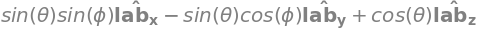

In [17]:
k_vec = WaveFrame.z
k_vec.express(LabFrame)

In [19]:
#k no referencial do detector
k_det=R.transpose()*k_onda
k_det

⎡sin(θ)⋅sin(ϕ) ⎤
⎢              ⎥
⎢-sin(θ)⋅cos(ϕ)⎥
⎢              ⎥
⎣    cos(θ)    ⎦

In [20]:
k_det == k_vec.to_matrix(LabFrame)

True

In [57]:
#escrevendo tensores e no refecial do detector
e_mais_det=R.transpose()*e_mais_onda*R
e_cruzado_det=R.transpose()*e_cruzado_onda*R
e_mais_det

⎡                                                                             
⎢                   (-sin(ψ)⋅cos(ϕ) - sin(ϕ)⋅cos(θ)⋅cos(ψ))⋅(sin(ψ)⋅cos(ϕ) + s
⎢                                                                             
⎢                                                                             
⎢(sin(ψ)⋅sin(ϕ) - cos(θ)⋅cos(ψ)⋅cos(ϕ))⋅(-sin(ψ)⋅cos(ϕ) - sin(ϕ)⋅cos(θ)⋅cos(ψ)
⎢                                                                             
⎢                                                                             
⎣                        -(-sin(ψ)⋅cos(ϕ) - sin(ϕ)⋅cos(θ)⋅cos(ψ))⋅sin(θ)⋅cos(ψ

                                                              2               
in(ϕ)⋅cos(θ)⋅cos(ψ)) + (-sin(ψ)⋅sin(ϕ)⋅cos(θ) + cos(ψ)⋅cos(ϕ))                
                                                                              
                                                                              
) + (-sin(ψ)⋅sin(ϕ)⋅cos(θ) + cos(ψ)⋅cos(ϕ))⋅(sin(ψ)

In [73]:
e_plus_dyadic.to_matrix(WaveFrame) == e_mais_onda

True

In [72]:
e_cross_dyadic.to_matrix(WaveFrame) == e_cruzado_onda

True

In [58]:
e_plus_dyadic.to_matrix(LabFrame) == e_mais_det

True

In [59]:
e_cross_dyadic.to_matrix(LabFrame) == e_cruzado_det

True

In [81]:
h1 = h_new(t, 2*L, e_plus_dyadic, e_cross_dyadic, A)
h1.to_matrix(WaveFrame)

⎡A⋅cos(2⋅L⋅ω - t⋅ω)   -A⋅sin(2⋅L⋅ω - t⋅ω)  0⎤
⎢                                           ⎥
⎢-A⋅sin(2⋅L⋅ω - t⋅ω)  -A⋅cos(2⋅L⋅ω - t⋅ω)  0⎥
⎢                                           ⎥
⎣         0                    0           0⎦

In [82]:
h1.to_matrix(LabFrame)

⎡(-sin(ψ)⋅cos(ϕ) - sin(ϕ)⋅cos(θ)⋅cos(ψ))⋅(-A⋅(-sin(ψ)⋅cos(ϕ) - sin(ϕ)⋅cos(θ)⋅c
⎢                                                                             
⎢ (-sin(ψ)⋅cos(ϕ) - sin(ϕ)⋅cos(θ)⋅cos(ψ))⋅(-A⋅(-sin(ψ)⋅sin(ϕ) + cos(θ)⋅cos(ψ)⋅
⎢                                                                             
⎣                                                    (-sin(ψ)⋅cos(ϕ) - sin(ϕ)⋅

os(ψ))⋅cos(2⋅L⋅ω - t⋅ω) - A⋅(-sin(ψ)⋅sin(ϕ)⋅cos(θ) + cos(ψ)⋅cos(ϕ))⋅sin(2⋅L⋅ω 
                                                                              
cos(ϕ))⋅cos(2⋅L⋅ω - t⋅ω) - A⋅(sin(ψ)⋅cos(θ)⋅cos(ϕ) + sin(ϕ)⋅cos(ψ))⋅sin(2⋅L⋅ω 
                                                                              
cos(θ)⋅cos(ψ))⋅(-A⋅sin(θ)⋅sin(ψ)⋅sin(2⋅L⋅ω - t⋅ω) - A⋅sin(θ)⋅cos(ψ)⋅cos(2⋅L⋅ω 

- t⋅ω)) + (-A⋅(-sin(ψ)⋅cos(ϕ) - sin(ϕ)⋅cos(θ)⋅cos(ψ))⋅sin(2⋅L⋅ω - t⋅ω) + A⋅(-s
                                                                              
- t⋅ω)) + (-A⋅(-sin(ψ)⋅sin(ϕ) + cos(θ)⋅cos(ψ)⋅cos(

In [76]:
h2_onda = h(t, 2*L, e_mais_onda, e_cruzado_onda, A)
h2_onda

⎡A⋅cos(2⋅L⋅ω - t⋅ω)   -A⋅sin(2⋅L⋅ω - t⋅ω)  0⎤
⎢                                           ⎥
⎢-A⋅sin(2⋅L⋅ω - t⋅ω)  -A⋅cos(2⋅L⋅ω - t⋅ω)  0⎥
⎢                                           ⎥
⎣         0                    0           0⎦

In [77]:
h2_det = h(t, 2*L, e_mais_det, e_cruzado_det, A)
h2_det

⎡                                                              ⎛              
⎢                                                            A⋅⎝(-sin(ψ)⋅cos(ϕ
⎢                                                                             
⎢                                                                             
⎢-A⋅((-sin(ψ)⋅sin(ϕ) + cos(θ)⋅cos(ψ)⋅cos(ϕ))⋅(-sin(ψ)⋅sin(ϕ)⋅cos(θ) + cos(ψ)⋅c
⎢                                                                             
⎢                                                                             
⎣                                                  -A⋅((-sin(ψ)⋅cos(ϕ) - sin(ϕ

                                                                              
) - sin(ϕ)⋅cos(θ)⋅cos(ψ))⋅(sin(ψ)⋅cos(ϕ) + sin(ϕ)⋅cos(θ)⋅cos(ψ)) + (-sin(ψ)⋅si
                                                                              
                                                                              
os(ϕ)) + (-sin(ψ)⋅cos(ϕ) - sin(ϕ)⋅cos(θ)⋅cos(ψ))⋅(s

In [80]:
h1.to_matrix(WaveFrame) == h2_onda

True

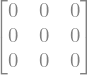

In [83]:
(h1.to_matrix(LabFrame) - h2_det).simplify()

In [40]:
#def PSI(n,h,k):
	#eturn 0.5*(n*h*n.transpose()/(1 - (k.dot(n))**2))
#função PSI(t)
#ef PSI_new(n,h,k):  
	#eturn 0.5*(n.dot(h.dot(n)))/(1 - (k.dot(n))**2)

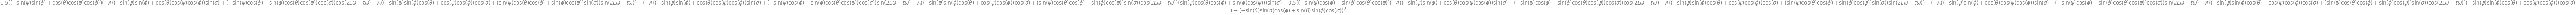

In [60]:
PSI1 =  PSI_new(n2,h_new(t, 2*L    , e_plus_dyadic, e_cross_dyadic,A),k_vec)

PSI1

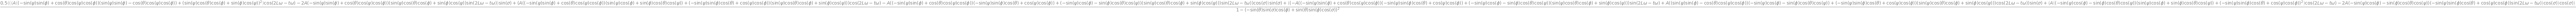

In [61]:
PSI2 =  PSI(n2_mat,h(t, 2*L, e_mais_det, e_cruzado_det,A),k_det)
PSI2 = PSI2[0]
PSI2

In [84]:
(PSI1 - PSI2).simplify()

In [75]:
expr1 = n2_mat*h(t, 2*L, e_mais_det, e_cruzado_det,A)
expr1

⎡                                                                             
⎣(-A⋅((sin(ψ)⋅sin(ϕ) - cos(θ)⋅cos(ψ)⋅cos(ϕ))⋅(-sin(ψ)⋅cos(ϕ) - sin(ϕ)⋅cos(θ)⋅c

                                                                              
os(ψ)) + (-sin(ψ)⋅sin(ϕ)⋅cos(θ) + cos(ψ)⋅cos(ϕ))⋅(sin(ψ)⋅cos(θ)⋅cos(ϕ) + sin(ϕ

                                                                              
)⋅cos(ψ)))⋅sin(2⋅L⋅ω - t⋅ω) + A⋅((sin(ψ)⋅sin(ϕ) - cos(θ)⋅cos(ψ)⋅cos(ϕ))⋅(-sin(

                                                                              
ψ)⋅cos(ϕ) - sin(ϕ)⋅cos(θ)⋅cos(ψ)) + (-sin(ψ)⋅sin(ϕ)⋅cos(θ) + cos(ψ)⋅cos(ϕ))⋅(s

                                                                 ⎛    ⎛       
in(ψ)⋅cos(θ)⋅cos(ϕ) + sin(ϕ)⋅cos(ψ)))⋅cos(2⋅L⋅ω - t⋅ω))⋅sin(σ) + ⎝- A⋅⎝(-sin(ψ

                                                                              
)⋅cos(ϕ) - sin(ϕ)⋅cos(θ)⋅cos(ψ))⋅(sin(ψ)⋅cos(ϕ) + sin(ϕ)⋅cos(θ)⋅cos(ψ)) + (-si

                                   2⎞         

In [76]:
expr2 = h1.dot(n2)
expr2 = expr2.to_matrix(LabFrame)
expr2

⎡(-sin(ψ)⋅cos(ϕ) - sin(ϕ)⋅cos(θ)⋅cos(ψ))⋅(-A⋅((-sin(ψ)⋅sin(ϕ) + cos(θ)⋅cos(ψ)⋅
⎢                                                                             
⎢(-sin(ψ)⋅sin(ϕ) + cos(θ)⋅cos(ψ)⋅cos(ϕ))⋅(-A⋅((-sin(ψ)⋅sin(ϕ) + cos(θ)⋅cos(ψ)⋅
⎢                                                                             
⎣                          (-A⋅((-sin(ψ)⋅sin(ϕ) + cos(θ)⋅cos(ψ)⋅cos(ϕ))⋅sin(σ)

cos(ϕ))⋅sin(σ) + (-sin(ψ)⋅cos(ϕ) - sin(ϕ)⋅cos(θ)⋅cos(ψ))⋅cos(σ))⋅cos(2⋅L⋅ω - t
                                                                              
cos(ϕ))⋅sin(σ) + (-sin(ψ)⋅cos(ϕ) - sin(ϕ)⋅cos(θ)⋅cos(ψ))⋅cos(σ))⋅cos(2⋅L⋅ω - t
                                                                              
 + (-sin(ψ)⋅cos(ϕ) - sin(ϕ)⋅cos(θ)⋅cos(ψ))⋅cos(σ))⋅sin(2⋅L⋅ω - t⋅ω) + A⋅((-sin

⋅ω) - A⋅((-sin(ψ)⋅sin(ϕ)⋅cos(θ) + cos(ψ)⋅cos(ϕ))⋅cos(σ) + (sin(ψ)⋅cos(θ)⋅cos(ϕ
                                                                              
⋅ω) - A⋅((-sin(ψ)⋅sin(ϕ)⋅cos(θ) + cos(ψ)⋅cos(ϕ))⋅c

In [74]:
expr1 == expr2

False

In [90]:
Y2_mat = (1+k_det.dot(n2_mat))*PSI(n2_mat,h(t, 2*L, e_mais_det, e_cruzado_det,A),k_det)\
   -(2*k_det.dot(n2_mat))*PSI(n2_mat,h(t,((1+k_det.dot(n2_mat))*L),e_mais_det,e_cruzado_det,A),k_det)\
   -(1-k_det.dot(n2_mat))*PSI(n2_mat,h(t, 0, e_mais_det, e_cruzado_det,A),k_det)
Y2_mat

⎡      ⎛⎛⎛  ⎛                                                                 
⎢  0.5⋅⎝⎝⎝A⋅⎝(-sin(ψ)⋅sin(ϕ) + cos(θ)⋅cos(ψ)⋅cos(ϕ))⋅(sin(ψ)⋅sin(ϕ) - cos(θ)⋅c
⎢- ───────────────────────────────────────────────────────────────────────────
⎢                                                                             
⎣                                                                             

                                                      2⎞                      
os(ψ)⋅cos(ϕ)) + (sin(ψ)⋅cos(θ)⋅cos(ϕ) + sin(ϕ)⋅cos(ψ)) ⎠⋅cos(t⋅ω) + 2⋅A⋅(-sin(
──────────────────────────────────────────────────────────────────────────────
                                                                              
                                                                              

                                                                              
ψ)⋅sin(ϕ) + cos(θ)⋅cos(ψ)⋅cos(ϕ))⋅(sin(ψ)⋅cos(θ)⋅cos(ϕ) + sin(ϕ)⋅cos(ψ))⋅sin(t
──────────────────────────────────────────────────

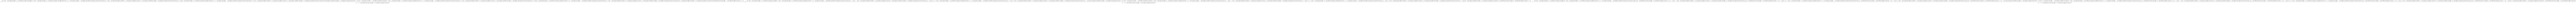

In [91]:
Y2 =   (1+k_vec.dot(n2)) * PSI_new(n2,h_new(t, 2*L                  , e_plus_dyadic, e_cross_dyadic,A),k_vec) \
     - (2*k_vec.dot(n2)) * PSI_new(n2,h_new(t, ((1+k_vec.dot(n2))*L), e_plus_dyadic, e_cross_dyadic,A),k_vec) \
     - (1-k_vec.dot(n2)) * PSI_new(n2,h_new(t, 0                    , e_plus_dyadic, e_cross_dyadic,A),k_vec)
Y2

In [92]:
(Y2 - Y2_mat[0]).simplify()

In [56]:
n2.dot(k_vec)

In [93]:
#Calculando Y3
#Y3=(1+k_det.dot(n3))*PSI(n3,h(t, 2*L, e_mais_det, e_cruzado_det,A),k_det)-(2*k_det.dot(n3))*PSI(n3,h(t,((1+k_det.dot(n3))*L),e_mais_det,e_cruzado_det,A),k_det)-(1-k_det.dot(n3))*PSI(n3,h(t, 0, e_mais_det, e_cruzado_det,A),k_det)
Y3 =   (1+k_vec.dot(n3)) * PSI_new(n3,h_new(t, 2*L                  , e_plus_dyadic, e_cross_dyadic,A),k_vec) \
     - (2*k_vec.dot(n3)) * PSI_new(n3,h_new(t, ((1+k_vec.dot(n3))*L), e_plus_dyadic, e_cross_dyadic,A),k_vec) \
     - (1-k_vec.dot(n3)) * PSI_new(n3,h_new(t, 0                    , e_plus_dyadic, e_cross_dyadic,A),k_vec)

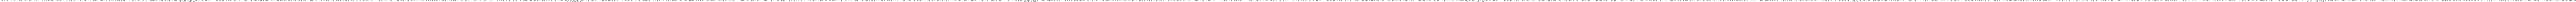

In [98]:
#calculando M
M=Y2-Y3
#M=sympy.expand_trig(M)
#M=sympy.expand(M)
M

In [97]:
M = M.simplify()

KeyboardInterrupt: 

In [59]:
#Calculando M direto da equação da aula
M1=(1+k_det.dot(n2))*PSI(n2_mat,h(t, 2*L, e_mais_det, e_cruzado_det,A),k_det)-((1+k_det.dot(n3_mat))*PSI(n3_mat,h(t, 2*L, e_mais_det, e_cruzado_det,A),k_det))-(((2*k_det.dot(n2_mat))*PSI(n2_det,h(t,((1+k_det.dot(n2_det))*L),e_mais_det,e_cruzado_det,A),k_det))-((2*k_det.dot(n3_det))*PSI(n3_det,h(t,((1+k_det.dot(n3_det))*L),e_mais_det,e_cruzado_det,A),k_det)))-(((1-k_det.dot(n2_det))*PSI(n2_det,h(t, 0, e_mais_det, e_cruzado_det,A),k_det))-((1-k_det.dot(n3))*PSI(n3,h(t, 0, e_mais_det, e_cruzado_det,A),k_det)))
termsM1=sympy.expand_trig(M1)
M1=termsM1[0]
M1=sympy.expand(M1)

TypeError: `b` must be an ordered iterable or Matrix, not <class 'sympy.physics.vector.vector.Vector'>.

In [64]:
M==M1

NameError: name 'M1' is not defined

In [99]:
#F plus escolhida como coef de cos(wt)
F_mais=M.coeff(cos(w*t))
#F_mais=sympy.trigsimp(F_mais)

In [100]:
#F cross escolhida como coef de cos(wt)
F_cruzado=M.coeff(sin(w*t))
#F_cruzado=sympy.trigsimp(F_cruzado)

In [101]:
#permitindo entrada de array nas funçoes
f_mais = sympy.lambdify([phi, theta, L, w, A, sigma, psi], F_mais)
f_cruzado = sympy.lambdify([phi, theta, L, w, A, sigma, psi], F_cruzado)

In [102]:
#defining parameters
phi_value, theta_value = np.mgrid[-np.pi:np.pi:100j, 0:np.pi:100j]
l=5e9/3e8 #segundos
f=10**-3 #Hz
freq=2*np.pi*f
a=1
sig=np.pi/4
PSI=0

In [103]:
#atribuindos os valores acima nas funções
f_mais_data = f_mais((phi_value),(theta_value),l,freq,a,sig,PSI)
f_cruzado_data = f_cruzado((phi_value),(theta_value),l,freq,a,sig,PSI)

In [104]:
#plot phi, theta e F
fig = plt.figure()
ax = fig.gca(projection='3d')
#ax.plot_surface(phi_value, theta_value,(f_mais_data),color='b')
ax.plot_surface(phi_value, theta_value,(f_cruzado_data-f_mais_data),color='g')
ax.set_xlabel('phi')
ax.set_ylabel('theta')
ax.set_zlabel('F+')
plt.show()



AttributeError: 'int' object has no attribute 'ndim'

In [66]:
#plot x,y,z

fig = plt.figure()
ax = fig.gca(projection='3d')

x_mais=(f_mais_data)*np.sin(theta_value)*np.sin(phi_value)
y_mais=-(f_mais_data)*np.sin(theta_value)*np.cos(phi_value)
z_mais=(f_mais_data)*np.cos(theta_value)

x_cruzado=(f_cruzado_data)*np.sin(theta_value)*np.sin(phi_value)
y_cruzado=-(f_cruzado_data)*np.sin(theta_value)*np.cos(phi_value)
z_cruzado=(f_cruzado_data)*np.cos(theta_value)

#ax.plot_surface(x_mais,y_mais,z_mais,color='b')
ax.plot_surface((x_cruzado-x_mais),(y_cruzado-y_mais),(z_cruzado-z_mais),color='g', label = 'F_cruzado')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()